In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/HRDataset_v14.csv')
data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [ ]:
data.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

# Pandas Question

In [ ]:
# 1. What is the minimum, median, max, and average salary for employee by Married Description and Gender
# Hints: use agg function
# Expected Output as below

import numpy as np
import pandas as pd

# multiple columns
employee_group = data.groupby(['MaritalDesc','Sex'])\
.agg(min_salary = ('Salary', 'min'), \
     median_salary = ('Salary', 'median'),
     max_salary = ('Salary', 'max'),
     average_salary = ('Salary', 'mean')).round(6)

employee_group.head(10)

min_salary  median_salary  max_salary  average_salary
MaritalDesc Sex                                                       
Divorced    F         45069        59393.0       68182    57345.500000
            M         45115        63738.5      148999    72520.857143
Married     F         45433        62662.0      250000    69638.986111
            M         46120        63370.5      157000    70089.038462
Separated   F         52984        60627.0       66149    60658.888889
            M         64397        70468.0       74417    69760.666667
Single      F         45395        62068.0      220450    68988.266667
            M         46428        63055.5      178000    71340.048387
Widowed     F         45046        63303.5      107226    69719.750000
            M         52788        61359.0       67176    60670.500000

In [ ]:
# 2.What is top-5 reason of termination?
# Expected Output as below

# multiple columns


termination = data.groupby(['TermReason'])\
.agg(total_termination = ('PerformanceScore', 'count')).sort_values(by='total_termination',
                                                                    ascending=False)
termination = termination.drop('N/A-StillEmployed')
termination.head(5)

,total_termination
TermReason,
Another position,20
unhappy,14
more money,11
career change,9
hours,8


In [ ]:
# 3. What is the highest number of employee by Recruitment Source that 'Exceeds' the Performance Score?
# Hints: Use filter for Performance Score first. Don't forget to sort_values
# Expected Output as below

# multiple columns

recruitmen_score = data[data["PerformanceScore"].str.contains("Exceeds")].groupby(by=['RecruitmentSource'])\
.agg(total_recruiter=('PerformanceScore','count'))

recruitmen_score.apply(lambda x: x.sort_values(ascending=False).head(7))

,total_recruiter
RecruitmentSource,
Indeed,12
LinkedIn,9
Diversity Job Fair,6
Employee Referral,5
CareerBuilder,2
Google Search,2
Website,1


In [ ]:
# 4. How many managers in each department?
# Hints: use nunique() as aggregation function
# Expected Output as below

# multiple columns
manager_department = data.groupby(['Department'])\
.agg(ManagerName = ('ManagerName', pd.Series.nunique))

manager_department.head(6)  

,ManagerName
Department,
Admin Offices,3
Executive Office,1
IT/IS,6
Production,10
Sales,4
Software Engineering,3


In [ ]:
# 5. What is Termination Ratio by Gender?
# Hints: use value_counts(normalize=True)
#Expected Output as below

#termination ratio by gender
termination_ratio = data.groupby('Sex')['Termd'].value_counts(normalize=True)

print(termination_ratio)

Sex  Termd
F    0        0.659091
     1        0.340909
M    0        0.674074
     1        0.325926
Name: Termd, dtype: float64


# Create an EDA and Data Visualization

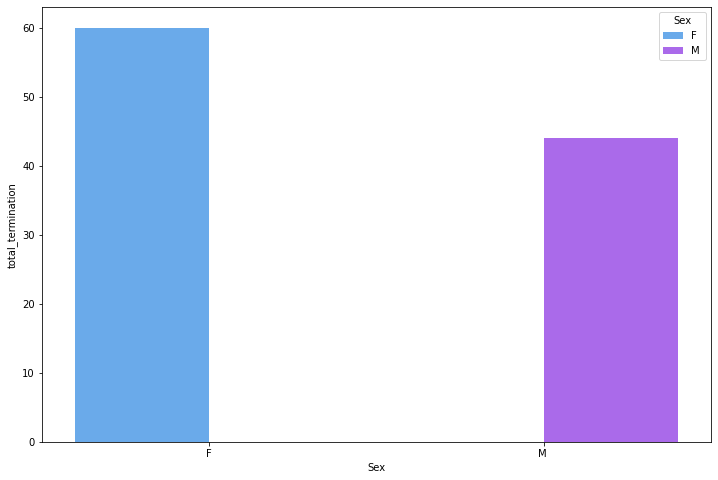

In [ ]:
#Sample Visualization, the example is not counted for the final score :p
#Create 5 visualization for better understanding on data
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

#Ratio termination by Gender

#Step1, get the data

term = data.groupby(by=['Sex'])\
                        .agg(total_termination=('Termd','sum')).reset_index()\

#Step2, Plot it
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='Sex', y='total_termination', hue='Sex', data=term, palette='cool')

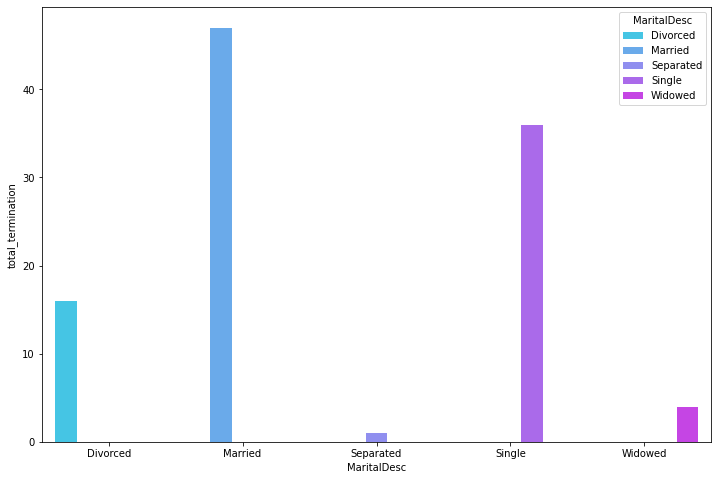

In [ ]:
#Data Visualization 1

#Ratio termination by MaritalDesc

#Step1, get the data

term = data.groupby(by=['MaritalDesc'])\
                        .agg(total_termination=('Termd','sum')).reset_index()\

#Step2, Plot it
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='MaritalDesc', y='total_termination', hue='MaritalDesc', data=term, palette='cool')

This visualization shows that someone who is married and single has a higher level of termination

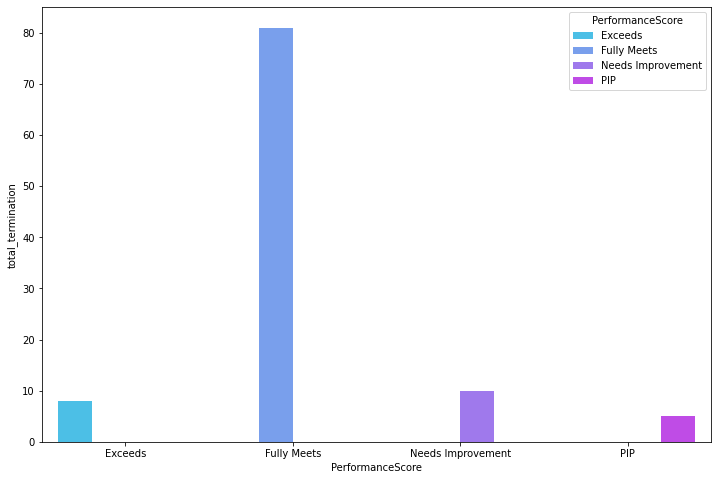

In [ ]:
#Data Visualization 2
#Ratio termination by PerformanceScore

#Step1, get the data

term = data.groupby(by=['PerformanceScore'])\
                        .agg(total_termination=('Termd','sum')).reset_index()\

#Step2, Plot it
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='PerformanceScore', y='total_termination', hue='PerformanceScore', data=term, palette='cool')

This visualization shows that someone whose performance score includes Fully Meets has a higher total termination

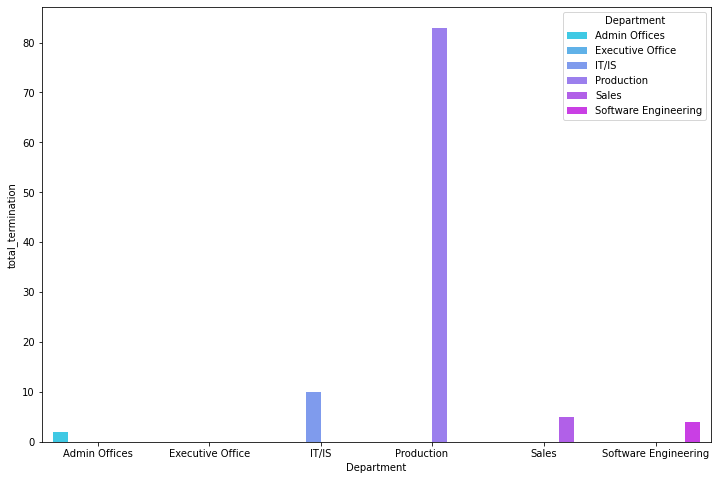

In [ ]:
#Data Visualization 3
#Ratio termination by Department

#Step1, get the data

term = data.groupby(by=['Department'])\
                        .agg(total_termination=('Termd','sum')).reset_index()\

#Step2, Plot it
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='Department', y='total_termination', hue='Department', data=term, palette='cool')

This visualization shows that someone who work in Production has a higher total termination

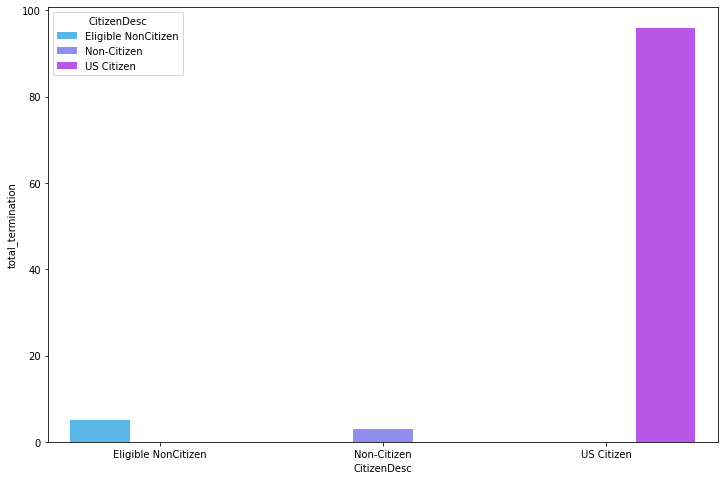

In [ ]:
#Data Visualization 4
#Ratio termination by CitizenDesc

#Step1, get the data

term = data.groupby(by=['CitizenDesc'])\
                        .agg(total_termination=('Termd','sum')).reset_index()\

#Step2, Plot it
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='CitizenDesc', y='total_termination', hue='CitizenDesc', data=term, palette='cool')

This visualization shows that someone who has US citizen  has a higher total termination

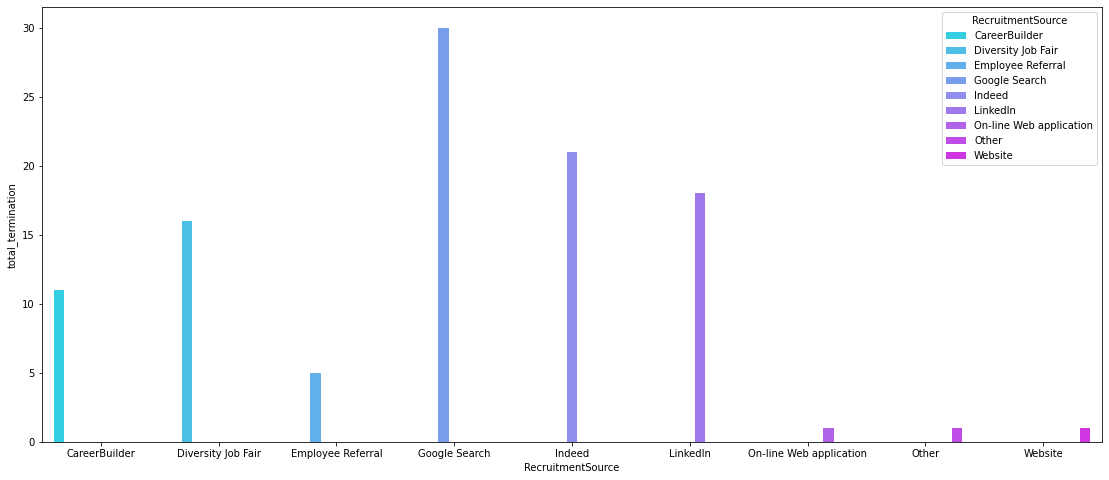

In [ ]:
#Data Visualization 5
#Ratio termination by RecruitmentSource

#Step1, get the data

term = data.groupby(by=['RecruitmentSource'])\
                        .agg(total_termination=('Termd','sum')).reset_index()\

#Step2, Plot it
f, ax = plt.subplots(1, 1, figsize=(19, 8))
ax = sns.barplot(x='RecruitmentSource', y='total_termination', hue='RecruitmentSource', data=term, palette='cool')

The visualization shows the best recruiting sources if you want to ensure a low ratio of termination is On-line Web application and Website.

# Create Machine Learning Model to Predict Termd

#Import Library

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
data_select = data[['MaritalDesc','Sex', 'EmploymentStatus', 'Department', 'PerformanceScore',  'Position', 'CitizenDesc', 'HispanicLatino',
          'RaceDesc', 'ManagerName', 'RecruitmentSource', 'EmpSatisfaction', 'SpecialProjectsCount','Salary', 'DaysLateLast30', 'Absences', 'Termd']]

In [ ]:
data_select.head()

,MaritalDesc,Sex,EmploymentStatus,Department,PerformanceScore,Position,CitizenDesc,HispanicLatino,RaceDesc,ManagerName,RecruitmentSource,EmpSatisfaction,SpecialProjectsCount,Salary,DaysLateLast30,Absences,Termd
0,Single,M,Active,Production,Exceeds,Production Technician I,US Citizen,No,White,Michael Albert,LinkedIn,5,0,62506,0,1,0
1,Married,M,Voluntarily Terminated,IT/IS,Fully Meets,Sr. DBA,US Citizen,No,White,Simon Roup,Indeed,3,6,104437,0,17,1
2,Married,F,Voluntarily Terminated,Production,Fully Meets,Production Technician II,US Citizen,No,White,Kissy Sullivan,LinkedIn,3,0,64955,0,3,1
3,Married,F,Active,Production,Fully Meets,Production Technician I,US Citizen,No,White,Elijiah Gray,Indeed,5,0,64991,0,15,0
4,Divorced,F,Voluntarily Terminated,Production,Fully Meets,Production Technician I,US Citizen,No,White,Webster Butler,Google Search,4,0,50825,0,2,1


In [ ]:
data_select.isnull().sum()

MaritalDesc             0
Sex                     0
EmploymentStatus        0
Department              0
PerformanceScore        0
Position                0
CitizenDesc             0
HispanicLatino          0
RaceDesc                0
ManagerName             0
RecruitmentSource       0
EmpSatisfaction         0
SpecialProjectsCount    0
Salary                  0
DaysLateLast30          0
Absences                0
Termd                   0
dtype: int64

In [ ]:
data_select.columns[:-5]

Index(['MaritalDesc', 'Sex', 'EmploymentStatus', 'Department',
       'PerformanceScore', 'Position', 'CitizenDesc', 'HispanicLatino',
       'RaceDesc', 'ManagerName', 'RecruitmentSource', 'EmpSatisfaction'],
      dtype='object')

#Preprocessing

In [ ]:
data_dummies = pd.get_dummies(data_select, columns=data_select.columns[:-5], drop_first=True)
data_dummies

,SpecialProjectsCount,Salary,DaysLateLast30,Absences,Termd,MaritalDesc_Married,MaritalDesc_Separated,MaritalDesc_Single,MaritalDesc_Widowed,Sex_M,...,RecruitmentSource_Google Search,RecruitmentSource_Indeed,RecruitmentSource_LinkedIn,RecruitmentSource_On-line Web application,RecruitmentSource_Other,RecruitmentSource_Website,EmpSatisfaction_2,EmpSatisfaction_3,EmpSatisfaction_4,EmpSatisfaction_5
0,0,62506,0,1,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,1
1,6,104437,0,17,1,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
2,0,64955,0,3,1,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,0,64991,0,15,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,0,50825,0,2,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,0,65893,0,13,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0
307,0,48513,5,4,1,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
308,6,220450,0,16,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
309,5,89292,0,11,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
data_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 93 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   SpecialProjectsCount                       311 non-null    int64
 1   Salary                                     311 non-null    int64
 2   DaysLateLast30                             311 non-null    int64
 3   Absences                                   311 non-null    int64
 4   Termd                                      311 non-null    int64
 5   MaritalDesc_Married                        311 non-null    uint8
 6   MaritalDesc_Separated                      311 non-null    uint8
 7   MaritalDesc_Single                         311 non-null    uint8
 8   MaritalDesc_Widowed                        311 non-null    uint8
 9   Sex_M                                      311 non-null    uint8
 10  EmploymentStatus_Terminated for Cause      311 non

In [ ]:
# Split data into X and y
x = data_dummies.drop('Termd', axis=1)
y = data_dummies['Termd']

In [ ]:
from sklearn.model_selection import train_test_split

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(random_state=1)
oversample = SMOTE()
x_train, y_train = oversample.fit_resample(x_train, y_train)

In [ ]:
y_train

0      0
1      0
2      0
3      0
4      0
      ..
337    1
338    1
339    1
340    1
341    1
Name: Termd, Length: 342, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(x_train)

StandardScaler()

In [ ]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

#Training

In [ ]:
models = {
    "   K-Nearest Neighbors": KNeighborsClassifier(),
    "   Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "         Decision Tree": DecisionTreeClassifier(),
    "        Neural Network": MLPClassifier(),
    "         Random Forest": RandomForestClassifier(n_estimators=500),
    "         XGBClassifier": XGBClassifier(n_estimators=700)
}

for name, model in models.items():
    model.fit(x_train, y_train)
    print(name + " trained.")

   K-Nearest Neighbors trained.
   Logistic Regression trained.
Support Vector Machine trained.
         Decision Tree trained.


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


        Neural Network trained.
         Random Forest trained.
         XGBClassifier trained.


#Result

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

for name, model in models.items():
    print(name + " Accuracy: {:.2f}%".format(model.score(x_test, y_test) * 100))
    y_pred = model.predict(x_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

   K-Nearest Neighbors Accuracy: 73.02%
[[26 10]
 [ 7 20]]
              precision    recall  f1-score   support

           0       0.79      0.72      0.75        36
           1       0.67      0.74      0.70        27

    accuracy                           0.73        63
   macro avg       0.73      0.73      0.73        63
weighted avg       0.74      0.73      0.73        63

   Logistic Regression Accuracy: 98.41%
[[36  0]
 [ 1 26]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        36
           1       1.00      0.96      0.98        27

    accuracy                           0.98        63
   macro avg       0.99      0.98      0.98        63
weighted avg       0.98      0.98      0.98        63

Support Vector Machine Accuracy: 88.89%
[[36  0]
 [ 7 20]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        36
           1       1.00      0.74      0.85        27

    a

In [ ]:
for name, model in models.items():
    print(name + " Accuracy: {:.2f}%".format(model.score(x_test, y_test) * 100))

   K-Nearest Neighbors Accuracy: 73.02%
   Logistic Regression Accuracy: 98.41%
Support Vector Machine Accuracy: 88.89%
         Decision Tree Accuracy: 95.24%
        Neural Network Accuracy: 90.48%
         Random Forest Accuracy: 92.06%
         XGBClassifier Accuracy: 93.65%


Using Logistic Regression model produce scores around 98%, which is good compared to several other models

#Visualization

In [ ]:
from sklearn.feature_selection import f_classif, chi2, mutual_info_classif
from sklearn.feature_selection import SelectKBest

selector = SelectKBest(k=10, score_func=f_classif)

In [ ]:
selector.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [23 26 29 44 54 57] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


SelectKBest()

In [ ]:
selector.get_support(indices=True)

array([ 6, 10, 12, 14, 20, 81, 83, 84, 89, 91])

In [ ]:
x.columns[selector.get_support(indices=True)]

Index(['MaritalDesc_Single', 'EmploymentStatus_Voluntarily Terminated',
       'Department_IT/IS', 'Department_Sales', 'Position_Area Sales Manager',
       'RecruitmentSource_Employee Referral', 'RecruitmentSource_Indeed',
       'RecruitmentSource_LinkedIn', 'EmpSatisfaction_3', 'EmpSatisfaction_5'],
      dtype='object')

In [ ]:
Select_columns = pd.DataFrame({'Important_Feature':x.columns[selector.get_support(indices=True)],
                  'Score':selector.get_support(indices=True)} )

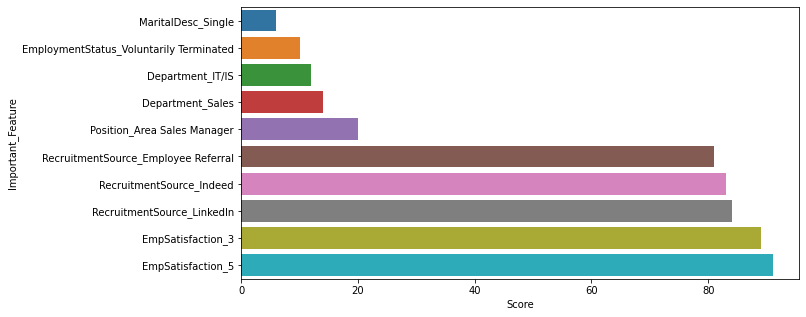

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.barplot(x='Score', y='Important_Feature', data=Select_columns)

# Answering the Question

a.	Is there any relationship between who a person works for (their manager) and their performance score?<br>
b.	What are our best recruiting sources if we want to ensure a low ratio of termination?<br>

In [ ]:
pearsoncorr = data.corr(method='pearson')
pearsoncorr

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
EmpID,1.000000,0.048058,-0.043851,0.035914,0.073750,0.107406,-0.691348,0.046805,-0.115319,0.092389,-0.036488,0.026858,0.090236,-0.589664,-0.146967,-0.043730,0.495513,-0.025278
MarriedID,0.048058,1.000000,0.164044,-0.024199,0.085619,-0.119932,-0.058362,-0.012708,0.026165,0.077028,-0.027334,-0.041147,-0.094002,-0.091178,-0.126191,0.061278,0.002875,0.096086
MaritalStatusID,-0.043851,0.164044,1.000000,-0.030236,0.114630,0.012768,0.044693,0.041117,-0.070291,0.099367,0.021923,0.010620,0.023065,0.033249,0.002068,-0.051093,-0.096500,0.018722
GenderID,0.035914,-0.024199,-0.030236,1.000000,-0.032440,-0.038838,-0.054915,0.031493,0.056097,-0.015741,-0.081612,0.048539,-0.043218,-0.036276,-0.044603,0.087073,0.080329,-0.004577
EmpStatusID,0.073750,0.085619,0.114630,-0.032440,1.000000,0.088711,-0.071208,0.189025,-0.110912,0.948058,0.221221,-0.150527,0.234222,0.024305,0.010553,-0.166560,0.078318,0.091834
DeptID,0.107406,-0.119932,0.012768,-0.038838,0.088711,1.000000,-0.084811,-0.129998,-0.448132,0.065922,0.030294,0.290023,0.550240,-0.094940,0.031997,-0.785101,0.124630,0.053308
PerfScoreID,-0.691348,-0.058362,0.044693,-0.054915,-0.071208,-0.084811,1.000000,0.012315,0.130903,-0.089061,0.005227,-0.058350,-0.060552,0.544927,0.303579,0.045677,-0.734728,0.046629
FromDiversityJobFairID,0.046805,-0.012708,0.041117,0.031493,0.189025,-0.129998,0.012315,1.000000,0.041248,0.147717,0.015085,-0.028314,0.007570,-0.013040,-0.034468,0.031393,0.042532,0.062640
Salary,-0.115319,0.026165,-0.070291,0.056097,-0.110912,-0.448132,0.130903,0.041248,1.000000,-0.093994,-0.130563,-0.037242,-0.435406,0.064966,0.062718,0.508333,-0.069443,0.082382
Termd,0.092389,0.077028,0.099367,-0.015741,0.948058,0.065922,-0.089061,0.147717,-0.093994,1.000000,0.147042,-0.139006,0.209113,-0.017543,-0.004732,-0.147429,0.136379,0.098274


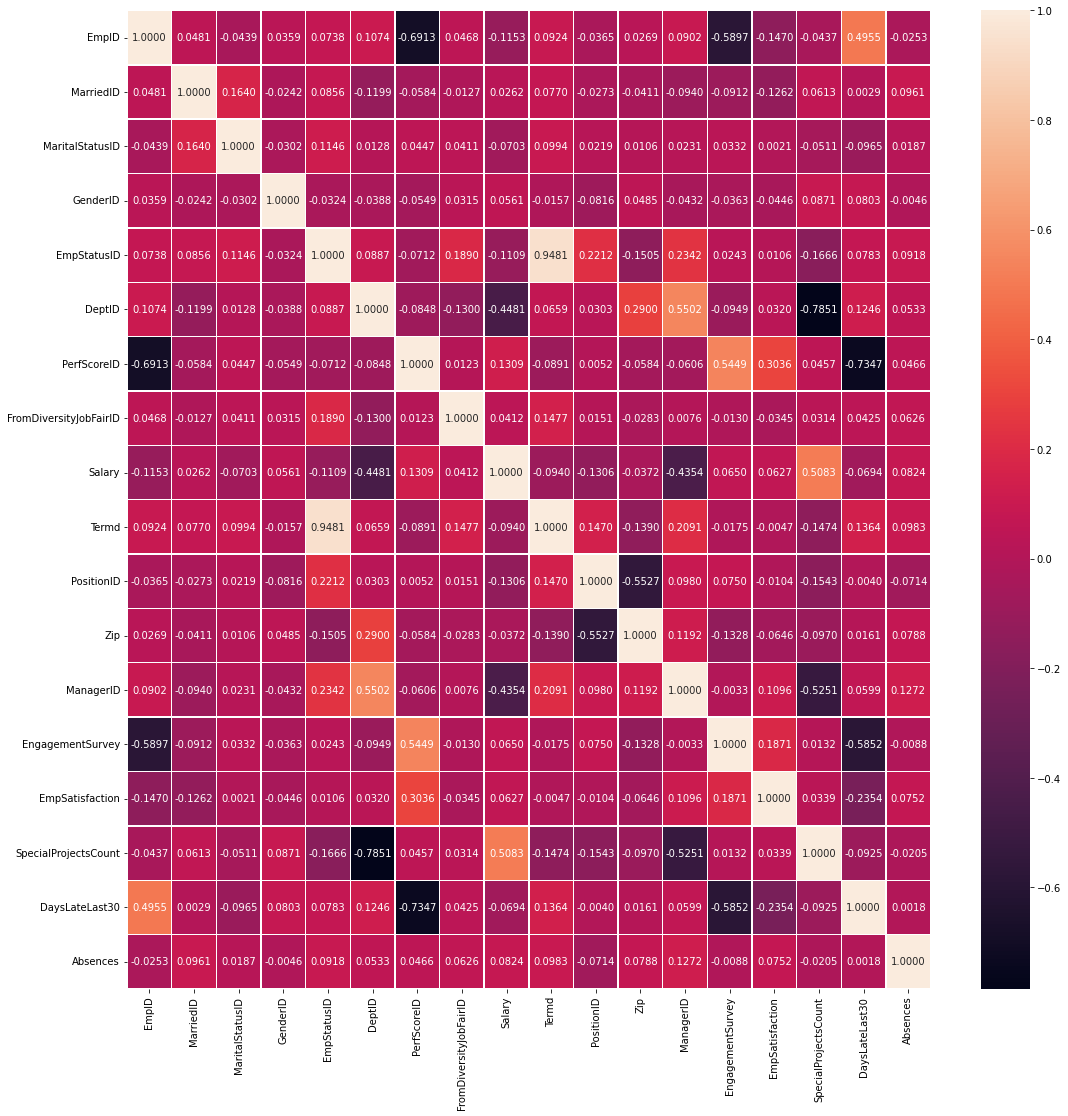

In [ ]:
#Plot a correlation map for all numeric variables
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(pearsoncorr, annot=True, linewidths=.4, fmt= '.4f',ax=ax)
plt.show()

As you can see from the graphic, plot correlation from between who a person works for (their manager) and their performance score show value -0.0606. This shows that two are not correlated

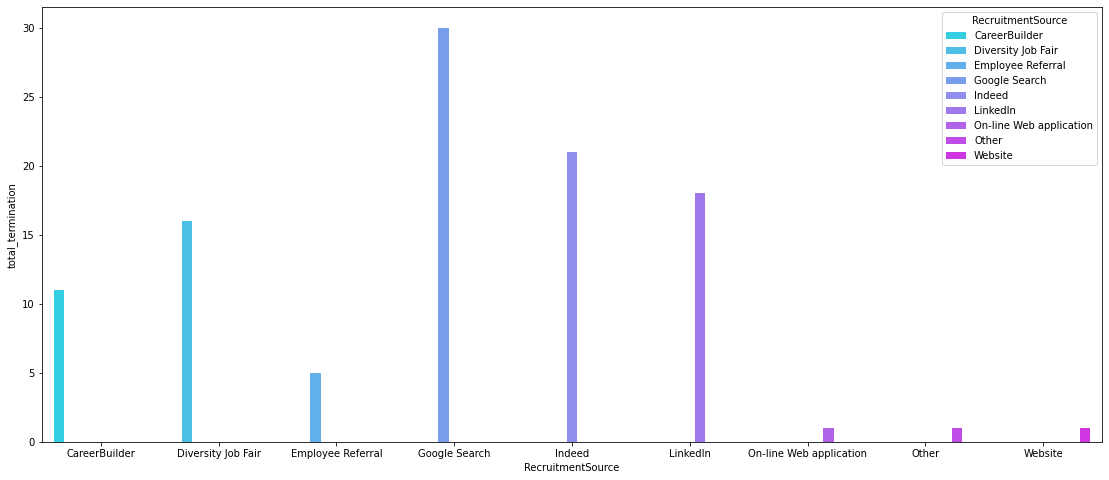

In [ ]:
term = data.groupby(by=['RecruitmentSource'])\
                        .agg(total_termination=('Termd','sum')).reset_index()\

#Step2, Plot it
f, ax = plt.subplots(1, 1, figsize=(19, 8))
ax = sns.barplot(x='RecruitmentSource', y='total_termination', hue='RecruitmentSource', data=term, palette='cool')

The best recruiting sources if you want to ensure a low ratio of termination based on the graph is On-line Web application and Website
